In [1]:
# Get an idea of the data in the cases_court csv file

import pandas as pd

def get_data():
    df = pd.read_csv('cases_court_key.csv') 
    return df

df = get_data()
df2=df.dropna()
df2=df.dropna(axis=0)

# Reset index after drop
df2=df.dropna().reset_index(drop=True)

# print(df2)
df = df2
print(df)


       year  state_code   state_name district_name  dist_code  court_no  \
0      2010           1  Maharashtra     Nandurbar          1         1   
1      2010           1  Maharashtra     Nandurbar          1         2   
2      2010           1  Maharashtra     Nandurbar          1         3   
3      2010           1  Maharashtra     Nandurbar          1         4   
4      2010           1  Maharashtra     Nandurbar          1         5   
...     ...         ...          ...           ...        ...       ...   
59423  2018          33       Ladakh        Kargil          1         2   
59424  2018          33       Ladakh        Kargil          1         3   
59425  2018          33       Ladakh           Leh          2         1   
59426  2018          33       Ladakh           Leh          2         2   
59427  2018          33       Ladakh           Leh          2         3   

                                      court_name  
0             Chief Judcial Magistrate Nandurbar

/tmp/ipykernel_558106/3476070889.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Courts'] = df['Courts'].str.replace('[^\w\ \(\)]','')
/tmp/ipykernel_558106/3476070889.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Courts'] = df2['Courts'].str.upper()


['CHIEF' 'CIVIL' 'DISTRICT' 'ADDITIONAL' 'CJJD' 'CIVILCUMCRIMINAL'
 'JUDICIAL' 'COURT' 'DISTJUDGEI' 'JTCIVIL' 'PRINCIPAL' 'RAILWAY' 'SMALL'
 'MOTOR' 'GRAM' 'JTCJJD' 'CJSD' 'JUVENILE' 'CRIMINAL' 'ADDL' 'DIST' 'JMFC'
 'ADDLDIST' 'ADDIL' 'METROPOLITAN' 'ADDLCHIEF' 'JMFCCOURT' 'JMFCRAILWAY'
 'KHADKI' 'JAMKHED' 'NEWASA' 'PATHARDI' 'RAHATA' 'SHEVGAON' 'JUNIOR'
 'SENIOR' 'DISTAND' 'JOINT' 'CJJDJMFCKURUNDWAD' 'CITY' 'FAST' 'INDUSTRIAL'
 'LABOUR' 'INUSTRIAL' 'MEMBER' 'COOPERATIVE' 'COOPRATIVE' 'COOPERTAIVE'
 'FAMILY' 'SCHOOL' 'MUNSIF' 'SPLJFCM' 'PRLSENIOR' 'PRLJUNIOR' 'JFCM'
 'SPECIAL' 'ADDATEEGALA' 'JUDGE' 'JUDL' 'PRLDISTRICT' 'PRINICIPAL'
 'PJCJCUMXIV' 'XIII' 'PRINICPAL' 'PRLCIVIL' 'PRIL' 'SRCIVIL' 'PRLSRCIVIL'
 'VACATION' 'PRESIDING' 'VACATIONAL' 'IIND' 'ADDLCIVIL' 'ADDLDISTRICT'
 'MMTC' 'JUDGEFAMILY' 'SUBORDINATE' 'MUNSIFF' 'JFCM1' 'JFCM2' 'JFCM3'
 'JFCM4' 'JFCM5' 'JFCM6' 'JFCM7' 'STAT' 'MACT' 'JFCMI' 'JFCMII' 'ADDLCJM'
 'JFCM8' 'JFCMIII' 'ACJM' 'MUNSIFFJFCM' 'SUBCOURT' 'MUNSIFFS' 'JFMC'
 '

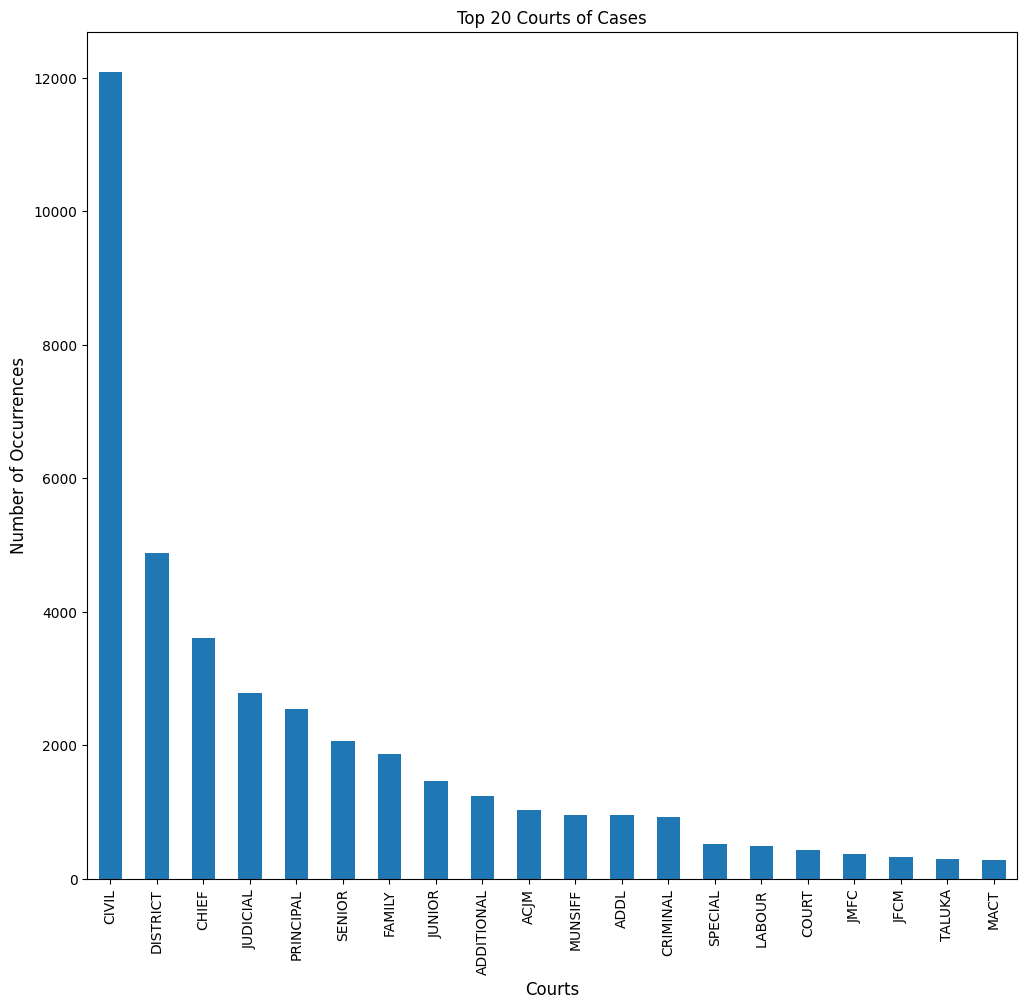

In [3]:
# Understand the type of court predominant in the dataset

df['Courts'] = df['court_name'].str.split(' ').str[0]
df['Courts'] = df['Courts'].str.replace('[^\w\ \(\)]','')

# Trim the dataset further such that only the Courts with more than 3 characters are considered
df2 = df[df['Courts'].str.len() > 3]

# print(df)
# print(df2)

# Now, we try to see which is the most predominant Courts of cases
df2['Courts'] = df2['Courts'].str.upper()
print(df2['Courts'].unique())
print(df2['Courts'].value_counts())

# We can also visualise the top 20 results data using a bar graph

import matplotlib.pyplot as plt
import seaborn as sns

top20 = df2['Courts'].value_counts()[:20]
top20.plot(kind='bar', figsize=(12,11))
plt.title('Top 20 Courts of Cases')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Courts', fontsize=12)
plt.savefig('top20_Courts.png')
plt.show()
